# IMT TAF Fiabilité : Test de charge

- **durée** 30s

In [1]:
%matplotlib inline
%config InlineBackend.rc = {'font.size': 10, 'figure.figsize': (16.0, 5.0),'figure.dpi': 75}
import pandas as pd
from matplotlib import pyplot as plt #%matplotlib notebook

In [2]:
d = pd.read_csv('data/stats.csv', parse_dates=['ts'], date_parser=lambda x: pd.to_datetime(x, unit='ms').tz_localize('UTC').tz_convert('Europe/Paris'),
                                names=['id','ts','path','latency','res','res_desc'])
d["grouppath"] = d.apply(lambda x: "/".join(x['path'].split("/")[:2]), axis=1)
sorted_data = d.sample(33).sort_values(by="latency" , ascending = False)
filterd_data = sorted_data[sorted_data["grouppath"] == "/order"]
filterd_data

/var/folders/0h/crjpwv4n1kl1tc30x1vhjhf80000gn/T/ipykernel_20601/785509217.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  d = pd.read_csv('data/stats.csv', parse_dates=['ts'], date_parser=lambda x: pd.to_datetime(x, unit='ms').tz_localize('UTC').tz_convert('Europe/Paris'),
/var/folders/0h/crjpwv4n1kl1tc30x1vhjhf80000gn/T/ipykernel_20601/785509217.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  d = pd.read_csv('data/stats.csv', parse_dates=['ts'], date_parser=lambda x: pd.to_datetime(x, unit='ms').tz_localize('UTC').tz_convert('Europe/Paris'),


,id,ts,path,latency,res,res_desc,grouppath


## Indicateurs - résumé

In [3]:
d.describe()

,id,latency,res_desc
count,5281.000000,5281.000000,5281.0
mean,2640.000000,8.493657,200.0
std,1524.637717,48.264871,0.0
min,0.000000,0.000000,200.0
25%,1320.000000,0.000000,200.0
50%,2640.000000,0.000000,200.0
75%,3960.000000,0.000000,200.0
max,5280.000000,487.000000,200.0


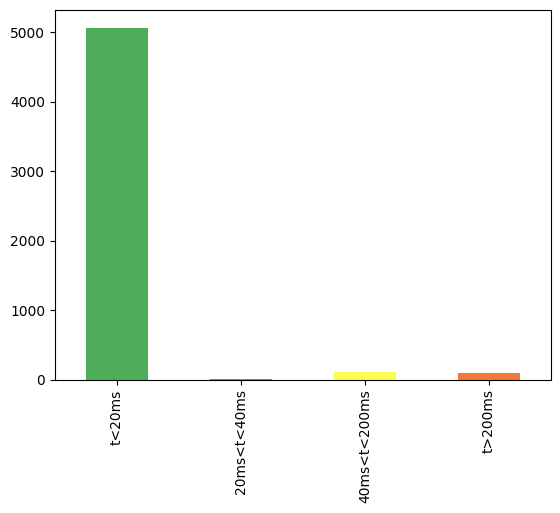

In [4]:
def histogroup(k):
    lat = d['latency'].loc[k]; ok = d['res'].loc[k]
    return "failed" if ok == "ko" else "t<20ms" if lat < 20 else "20ms<t<40ms" if lat < 40 else "40ms<t<200ms" if lat < 200 else "t>200ms"
histo = d.groupby(histogroup)['id'].count()
ordered_labels = ["failed", "t<20ms", "20ms<t<40ms", "40ms<t<200ms", "t>200ms"]; color_dict = {"t<20ms": '#4eac5b', "20ms<t<40ms": '#608ece', "40ms<t<200ms" : '#fffc54', "t>200ms" : '#ef7b36', "failed": 'r'}
histo = histo.reindex(pd.Categorical(histo.index,categories=ordered_labels,ordered=True)).sort_index()
colors = [color_dict[l] for l in histo.index]
histo.plot.bar(color=colors);

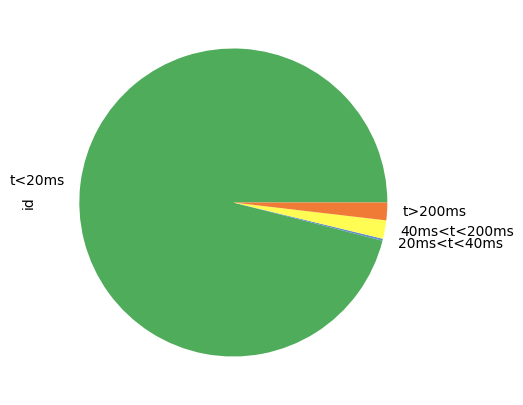

In [5]:
histo.plot.pie(colors=colors,figsize=(5,5));

In [6]:
def okcount(x):
    return x.value_counts().get("ok", 0)
def kocount(x):
    return x.value_counts().get("ko", 0)
def koper(x):
    return 100*(x.value_counts().get("ko", 0) / x.count())
def pct95th(x):
    print(x.values)
    print(x.count())
    print(x.quantile([1]))
    return x.quantile(0.95)
def pct99th(x):
    return x.quantile(0.99)
def reqpersec(x):
    return x.groupby(x.apply(lambda y: y.floor('s'))).count().mean()

#d.groupby(["grouppath"])
d.groupby(["grouppath"]).agg({'res': ['count',okcount,kocount,koper],'latency': ['mean','std','min','max'],'ts': [reqpersec]})
# d.groupby(["grouppath"]).agg({'res': [okcount]})


res                         latency                      \
                 count okcount kocount koper      mean        std min  max   
grouppath                                                                    
/aggregate-stats  5281    5281       0   0.0  8.493657  48.264871   0  487   

                        ts  
                 reqpersec  
grouppath                   
/aggregate-stats  86.57377

## Temps de réponse (ms)

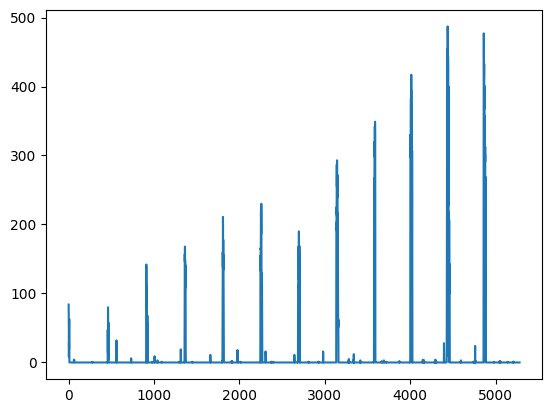

In [7]:
d.groupby(d['grouppath'])['latency'].plot();

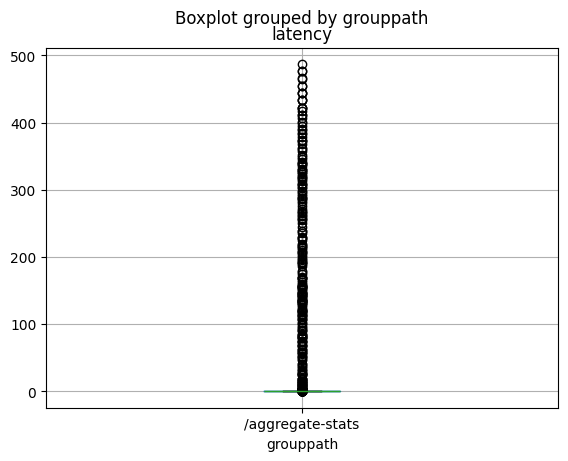

In [8]:
d.boxplot(column=['latency'], by='grouppath');